In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import classification_report, confusion_matrix
import shap
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

In [78]:
#reading the data from CSV
data = pd.read_csv("C:/MyWorks/MyResearch/BugReproduction/project/RQ1/Eclipse/JDT/master-eclipse-firefox-cleaned-encoded-2021.csv")

In [80]:
#randomization
data=data.sample(frac=1)
print(data.head())

      component  priority  severity  isDependent  numberOfDepends  doesBlock  \
109           8         3         4            0                0          0   
1038         23         3         4            0                0          1   
496          24         3         4            0                0          0   
485           8         3         4            0                0          0   
80            8         3         4            0                0          0   

      numberOfBlocked  reporterIsAssignee  hasCC  numberOfCC  hasAttachment  \
109                 0                   0      1           3              0   
1038                1                   0      1           5              1   
496                 0                   1      1           3              0   
485                 0                   0      1           2              0   
80                  0                   0      1           2              0   

      numberOfAttachment  titleReadability  

In [81]:
#divide the features and classes
cols_to_retain = ["component","priority","severity","isDependent","numberOfDepends","doesBlock","numberOfBlocked",
                  "reporterIsAssignee","hasCC","numberOfCC","hasAttachment","numberOfAttachment","titleReadability",
                  "descReadability","positiveCount","negativeCount","neutralCount"]
X=data[cols_to_retain]
y=data["classlabel"]

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

In [83]:
xgb_model = xgb.XGBClassifier().fit(X,y)

[23:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [84]:
xgb_explainer = shap.Explainer(xgb_model, X)

In [85]:
xgb_shap_values=xgb_explainer.shap_values(X)
xgb_shap_values

array([[ 0.18850614, -0.18621759,  0.24570309, ...,  0.04333063,
        -0.03280268,  0.14821473],
       [-0.95816741, -0.18875064,  0.30462663, ..., -0.01545452,
        -0.08796761,  0.09831477],
       [-0.21226055, -0.12217548,  0.365266  , ..., -0.01246239,
        -0.14081781, -0.10559291],
       ...,
       [ 0.08599405,  0.7045134 ,  0.41677095, ...,  0.0056282 ,
        -0.0425129 ,  0.09847587],
       [ 0.25908267, -0.03625764,  0.23644154, ..., -0.0102427 ,
        -0.00189415,  0.00667788],
       [ 0.33199721, -0.09034648,  0.28687941, ..., -0.00711645,
        -0.03333415, -0.0263891 ]])

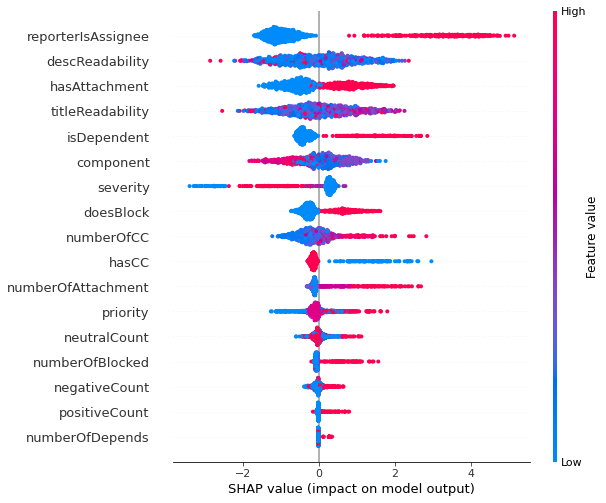

In [86]:
shap.summary_plot(xgb_shap_values, X)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
#RandomForest classifier!
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=0)
rf_model = rf_classifier.fit(X, y)

In [89]:
rf_explainer = shap.TreeExplainer(rf_model)
#shap_values = explainer.shap_values(X)

In [90]:
rf_shap_values = rf_explainer.shap_values(X, approximate=False, check_additivity=False)

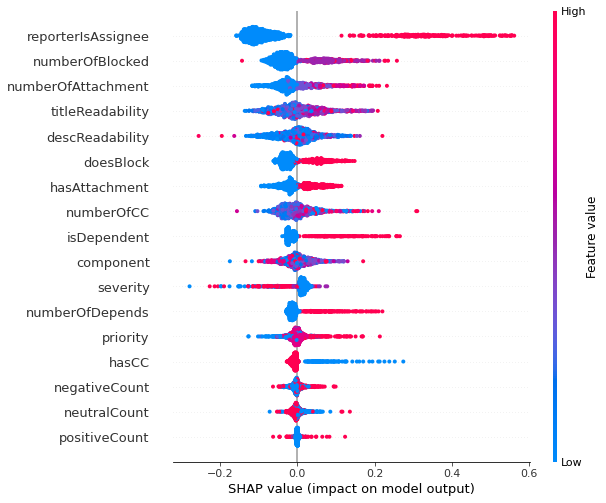

In [91]:
shap.summary_plot(rf_shap_values[1], X)
#shap.plots.beeswarm(explainer.expected_value, shap_values, X)

In [5]:
#original positive instance from dataset
#line 1088
# sampling moved this record to 469
#This is used for Waterfall & Forceplot of RF


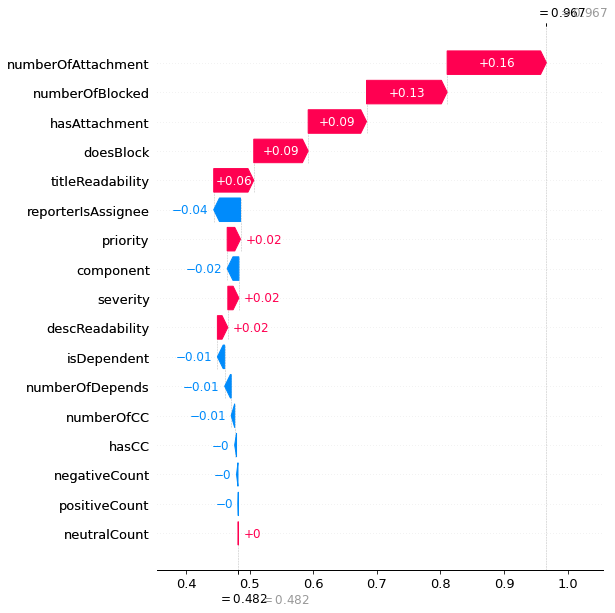

In [113]:
shap.plots._waterfall.waterfall_legacy(rf_explainer.expected_value[1], rf_shap_values[1][469], feature_names=X.columns.to_list(), 
                                       max_display=20, show=True )

In [72]:
shap.initjs()

In [114]:
shap.force_plot(rf_explainer.expected_value[1], rf_shap_values[1][469], feature_names=X.columns.to_list())

In [94]:
##Logistic Regression
lr_classifier=LogisticRegression(max_iter=3000, dual=False)
lr_model=lr_classifier.fit(X,y)

In [95]:
lr_model.predict(X)

array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [96]:
lr_explainer=shap.LinearExplainer(lr_model, X)

In [97]:
lr_shap_values=lr_explainer.shap_values(X)

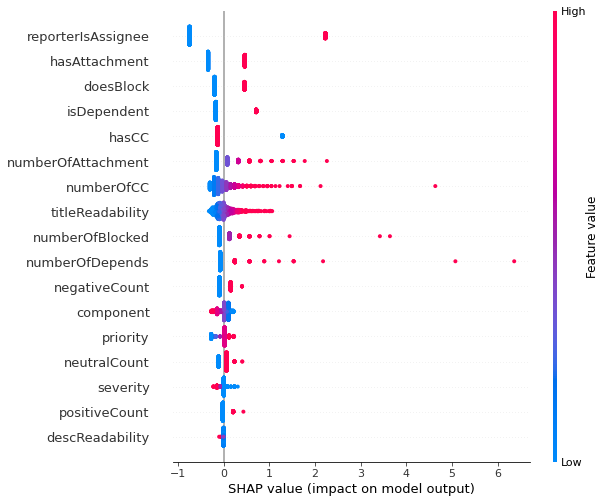

In [112]:
shap.summary_plot(lr_shap_values, X, max_display=20)

In [104]:
#find the target index
X.loc[X['titleReadability'] == 34.243202]
X.index.get_loc(1087)

469

In [75]:
#X.iloc[696]
X.iloc[306]

component              28.000000
priority                1.000000
severity                4.000000
isDependent             0.000000
numberOfDepends         0.000000
doesBlock               0.000000
numberOfBlocked         0.000000
reporterIsAssignee      0.000000
hasCC                   0.000000
numberOfCC              0.000000
hasAttachment           0.000000
numberOfAttachment      0.000000
titleReadability       34.243202
descReadability       130.647467
positiveCount           1.000000
negativeCount           0.000000
neutralCount            0.000000
Name: 840, dtype: float64

In [4]:
#original negative instance from dataset
#line 842
# Sampling moved this record to 311
#This is used for Waterfall & Forceplot of LR

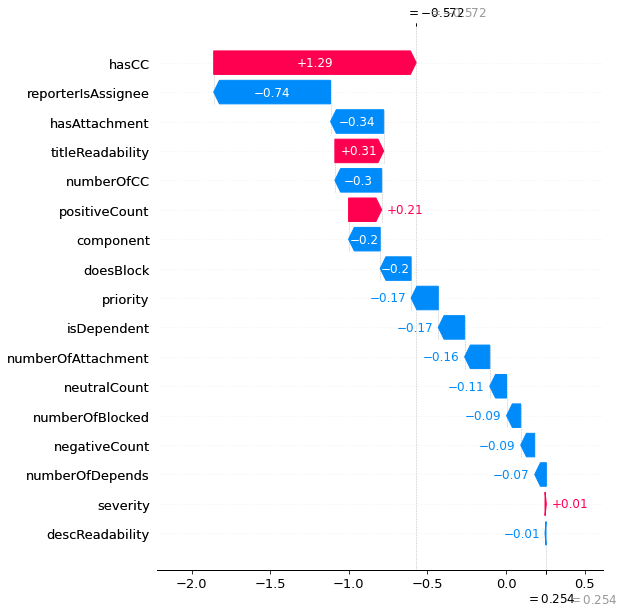

In [115]:
shap.plots._waterfall.waterfall_legacy(lr_explainer.expected_value, lr_shap_values[311], feature_names=X.columns.to_list(), 
                                       max_display=20 )

In [116]:
shap.force_plot(lr_explainer.expected_value, lr_shap_values[311], feature_names=X.columns.to_list())